# Salary Predictor System
### The Question
"How much is a company paying?" is a common question among all the people looking for work around the world as well as for our fellow classmates. The same query, "How much salary is the employee expecting?" is posed to recruiters as well. To answer these questions we have come up with a salary predictor.

### The Data
Our data consists of various parameters such as Median Salary, Max Salary, Min salary, company position, post position, etc.

### The Approach
Because we need to predict values of dependent variables with some information available already, we are using Regression. Also, our model needs pattern recognition and financial prediction so we are using the KNN algorithm as well.

### Our Hypothesis
It appears that the Median Salary is very important for training our model, so this becomes our target variable and we clean, process, and redefine the columns along with the values to make our model predict with better accuracy.

### Why Bother?
Teaching the machine to crunch numbers and accurately predict data is something not new in the Machine Learning and AI field. However, it can be used to obtain a marginal benefit to many people. We are also trying to address a major issue in today's Professional world. Salary Predictors can be used widely ranging from big Fortune 500 companies to small-scale startups. This is not predicting some random number, but this is the livelihood for many people upon which they can decide whether to apply for this company or not. In the same way, Employers can decide whether they are overpaying or underpaying anybody.  




## **Basic Setup:**
### Make sure you have installed all the required Python packages first and then read the data

We imported various libraries like pandas,numpy,matplotlib for data analysis,mathematical calculations,plotting graphs,etc.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# The drive link for the dataset
link = 'https://drive.google.com/file/d/15Eu83XFDqbOse0zGv-VFHi4xspQPYlw6/view?usp=share_link'

In [4]:
# Loading the dataset in a dataframe using the pandas library
df = pd.read_csv('/content/LinkedInJobs_MLDataset.csv')

In [5]:
# Printing the first 5 entries of the dataset to visualize the raw data.
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


# **Data Cleaning**

We took a pre-existing data set and first cleaned it i.e. removed the things which were unnecesarry for our model .


In [6]:
# Defining new column names
new_column_names = {
    'Co_Nm': 'Company_Name',
    'Co_Pg_Lstd': 'Company_Page_Listed',
    'Emp_Cnt': 'Employee_Count',
    'Flw_Cnt': 'Followers_Count',
    'Job_Ttl': 'Job_Title',
    'Job_Desc': 'Job_Description',
    'Is_Supvsr': 'Is_Supervisor',
    'max_sal': 'Max_Salary',
    'med_sal': 'Median_Salary',
    'min_sal': 'Min_Salary',
    'py_prd': 'Posting_Period',
    'py_lstd': 'Posting_Listed',
    'wrk_typ': 'Work_Type',
    'loc': 'Location',
    'st_code': 'State_Code',
    'is_remote': 'Is_Remote',
    'views': 'Views',
    'app_typ': 'Application_Type',
    'app_is_off': 'Application_Is_Offsite',
    'xp_lvl': 'Experience_Level',
    'domain': 'Domain',
    'has_post_domain': 'Has_Posting_Domain',
    'is_sponsored': 'Is_Sponsored',
    'base_comp': 'Base_Compensation'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Checking the updated column names
df.columns

Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Followers_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period',
       'Posting_Listed', 'Work_Type', 'Location', 'State_Code', 'Is_Remote',
       'Views', 'Application_Type', 'Application_Is_Offsite',
       'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored',
       'Base_Compensation'],
      dtype='object')

In [7]:
# Droping the columns that have string values as our target variable is an integer, so it won't affect our prediction
# as shown in the above correlation output.
df.drop(['Job_Title','Job_Description', 'Location', 'State_Code', 'Domain'], axis=1, inplace=True)

# Checking the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Is_Supervisor           33246 non-null  bool   
 5   Max_Salary              33246 non-null  float64
 6   Median_Salary           33246 non-null  float64
 7   Min_Salary              33246 non-null  float64
 8   Posting_Period          33246 non-null  object 
 9   Posting_Listed          33246 non-null  bool   
 10  Work_Type               33246 non-null  object 
 11  Is_Remote               33246 non-null  int64  
 12  Views                   33246 non-null  int64  
 13  Application_Type        33246 non-null  object 
 14  Application_Is_Offsite  33246 non-null

In [8]:
# Remove all the missing values
df.dropna(inplace=True)

In [9]:
# Remove all the duplicate rows.
df = df.drop_duplicates()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Converting boolean columns to integer (either 0 or 1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Encoding categorical columns to unique integer values
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))

The heatmap displays correlation values between variables, annotating each cell with correlation values. The resulting plot is titled "Correlation Matrix" and provides a visual representation of how variables in the dataset are correlated with each other.

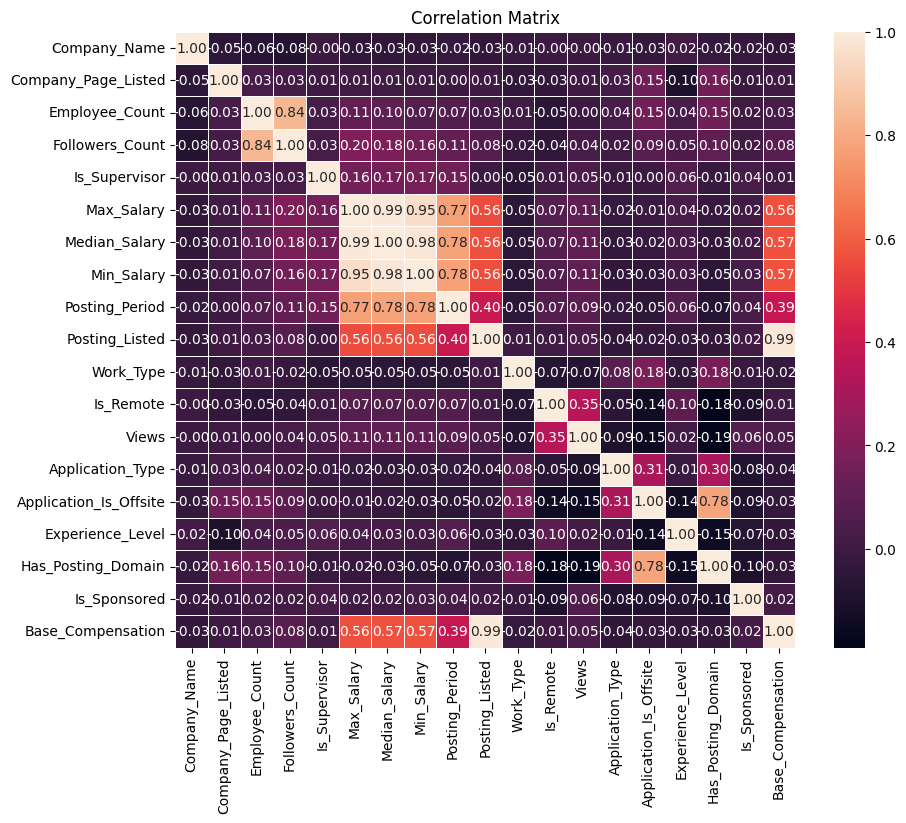

In [11]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

We selected the target variable as "Median_Salary" here.Then we mapped others parameters with our target variable.

In [12]:
# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)

Median_Salary             1.000000
Max_Salary                0.991847
Min_Salary                0.984359
Posting_Period            0.780213
Base_Compensation         0.571924
Posting_Listed            0.564299
Followers_Count           0.183189
Is_Supervisor             0.165016
Views                     0.108406
Employee_Count            0.097747
Is_Remote                 0.070466
Experience_Level          0.032988
Is_Sponsored              0.022424
Company_Page_Listed       0.010669
Application_Is_Offsite   -0.017088
Application_Type         -0.025683
Has_Posting_Domain       -0.029058
Company_Name             -0.033752
Work_Type                -0.050648
Name: Median_Salary, dtype: float64


Here, we removed the two coloumns Max_Salary and Min_Salary as they were no longer needed in the training of our model. This is because these 2 columns are highly corelated with our target column and might lead to overfitting.


In [13]:
# Drop columns related to Max_Salary and Min_Salary
df.drop(['Max_Salary', 'Min_Salary'], axis=1, inplace=True)

# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
correlation_with_target

Median_Salary             1.000000
Posting_Period            0.780213
Base_Compensation         0.571924
Posting_Listed            0.564299
Followers_Count           0.183189
Is_Supervisor             0.165016
Views                     0.108406
Employee_Count            0.097747
Is_Remote                 0.070466
Experience_Level          0.032988
Is_Sponsored              0.022424
Company_Page_Listed       0.010669
Application_Is_Offsite   -0.017088
Application_Type         -0.025683
Has_Posting_Domain       -0.029058
Company_Name             -0.033752
Work_Type                -0.050648
Name: Median_Salary, dtype: float64

In [14]:
# Printing the updated dataframe
df.head()

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Median_Salary,Posting_Period,Posting_Listed,Work_Type,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation
0,4438,1,1171,11417,0,5250.00,1,1,1,0,9,1,1,2,1,0,1
1,6249,1,300,2923,0,0.00,2,0,1,0,0,1,1,6,1,0,0
2,10169,1,314,8487,1,0.00,2,0,1,0,0,1,1,6,1,0,0
3,3312,1,36,305,0,22.27,0,1,1,0,1,1,1,2,1,0,1
4,11188,1,1227,51933,0,240895.00,6,1,1,1,0,1,1,5,1,0,1


In [15]:
from sklearn.preprocessing import LabelEncoder

df_salary = df

# Calculate the median of the "Median_Salary" feature
median_salary_threshold = df_salary['Median_Salary'].median()

# Create a new binary target variable, to show if the median salary of that row is created than the median of all median salaries.
df_salary['Salary'] = (df_salary['Median_Salary'] > median_salary_threshold).astype(int)

# Drop the original "Median_Salary" column
df_salary = df_salary.drop('Median_Salary', axis=1)

# Label encode the 'Salary_Class' column
label_encoder = LabelEncoder()
df_salary['Salary'] = label_encoder.fit_transform(df_salary['Salary'])

df_salary.head()

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Posting_Period,Posting_Listed,Work_Type,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Salary
0,4438,1,1171,11417,0,1,1,1,0,9,1,1,2,1,0,1,1
1,6249,1,300,2923,0,2,0,1,0,0,1,1,6,1,0,0,0
2,10169,1,314,8487,1,2,0,1,0,0,1,1,6,1,0,0,0
3,3312,1,36,305,0,0,1,1,0,1,1,1,2,1,0,1,1
4,11188,1,1227,51933,0,6,1,1,1,0,1,1,5,1,0,1,1


# Training Model

Once we got all the things that were needed from our data-set , we split the data in two parts. One was for training purpose and one was for testing purpose.

In [16]:
# Split the data into training and testing sets
X = df_salary.drop('Salary', axis=1)
y = df_salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24072, 16)
X_test shape: (6019, 16)
y_train shape: (24072,)
y_test shape: (6019,)


This trains a logistic regression model, makes predictions, and assesses its performance using accuracy, AUC, and a detailed classification report to understand how well the model performs on the test data.

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.60
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.97      0.74      3512
           1       0.67      0.09      0.17      2507

    accuracy                           0.60      6019
   macro avg       0.63      0.53      0.45      6019
weighted avg       0.63      0.60      0.50      6019



Performing an extensive search for the best hyperparameters for the KNN classifier, training the model with different parameter combinations and evaluating its performance to identify the most optimal configuration.

In [18]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", knn_accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.7722212992191394
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      3512
           1       0.73      0.72      0.73      2507

    accuracy                           0.77      6019
   macro avg       0.77      0.76      0.77      6019
weighted avg       0.77      0.77      0.77      6019



### Plotting bar chart for model comparison



Bar chart comparing the performance (accuracy) of two machine learning models, namely Logistic Regression and K-Nearest Neighbors (KNN), based on their respective accuracy scores.

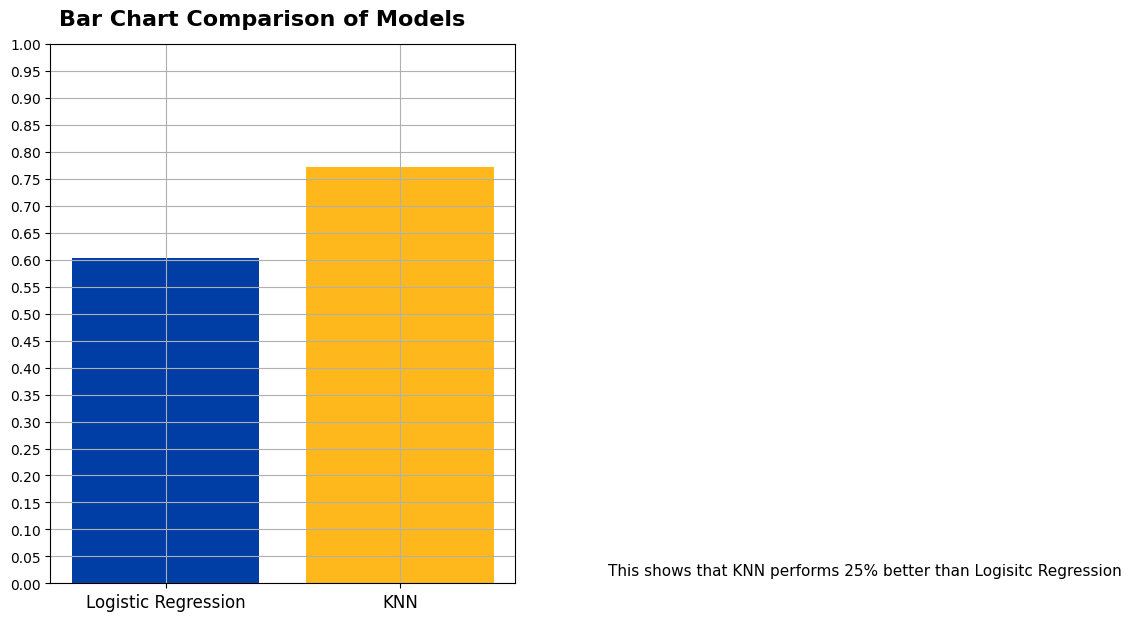

In [19]:
algorithms=("Logistic Regression","KNN")
scores = (lr_accuracy, knn_accuracy)
y_pos = np.arange(1,3)
colors = ("#003DA5","#FFB81C")
plt.figure(figsize=(6,7))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=12)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()

plt.suptitle(
    "Bar Chart Comparison of Models",
    fontsize=16,
    fontweight="bold",
    x=0.14,
    y=0.93,
    ha="left",
)
plt.title(
    "This shows that KNN performs 25% better than Logisitc Regression",
    fontsize=11,
    x=1.2,
    y=0,
    ha="left",
)

plt.show()

Conclusion: We succesfully developed a model for Salary prediction using two different algorithms.Our model is quite accurate and can be extensively used by both employers and employee to predict the Salary.